# **Project Name**    -Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce


##### **Project Type**    - Unsupervised ML( Clustering), Collaborative Filtering – Recommendation System

##### **Contribution**    - Individual
##### **Name** - Ayush Singh

# **Project Summary -**

This project involved building a complete customer analytics and product recommendation system using transactional retail data. The dataset was thoroughly cleaned by removing cancelled invoices, invalid entries, and missing values, resulting in over 390,000 valid transactions. Key behavioral features were engineered, such as Recency, Frequency, and Monetary (RFM), along with Average Order Value, Purchase Span, and Order Rate. These features were scaled and used to segment customers via clustering algorithms. K-Means was identified as the best-performing clustering method, evaluated using Silhouette Score and Davies-Bouldin Index, and clusters were labeled intuitively as High-Value, Regular, Occasional, or At-Risk based on their RFM profiles. In parallel, an item-based collaborative filtering system was implemented using cosine similarity on the Customer–Product purchase matrix. It allows users to input a product and receive five similar product recommendations. All components were integrated into an interactive Streamlit app with sidebar-based navigation. The app features a Home page, a Clustering module where users can enter RFM values to predict a customer segment using a pre-trained KMeans model, and a Recommendation module to get product suggestions based on purchase behavior. The entire solution demonstrates an end-to-end pipeline from preprocessing to real-time decision support, blending data science with user-friendly deployment.

# **GitHub Link -**

https://github.com/AyushSinghRana15/Unsupervised-ML-Shopper-Spectrum.git

# **Problem Statement :**
The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# **Let's Begin**

In [1]:
!pip install gdown

In [2]:
#importing important libraries
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Clustering
from sklearn.cluster import KMeans

# For Google Drive file access
import gdown


In [3]:
# Google Drive file ID
file_id = "1rzRwxm_CJxcRzfoo9Ix37A2JTlMummY-"

# Output file name
output = "dataset.csv"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Read the dataset
df = pd.read_csv(output)

# Preview the first five rows
df.head()

Downloading...
From: https://drive.google.com/uc?id=1rzRwxm_CJxcRzfoo9Ix37A2JTlMummY-
To: /Users/ayushsingh/Internship Projects/2nd Project/dataset.csv
100%|██████████████████████████████████████| 48.6M/48.6M [00:10<00:00, 4.70MB/s]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA

In [4]:
# Number of rows and columns
print(f"Dataset shape: {df.shape}")

# Column names and data types
print("\nData types and non-null counts:")
print(df.info())


Dataset shape: (541909, 8)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Description      1454
CustomerID     135080
dtype: int64


In [7]:
print(f"Unique customers: {df['CustomerID'].nunique()}")
print(f"Unique products: {df['StockCode'].nunique()}")

Unique customers: 4372
Unique products: 4070


In [8]:
# purchase dates range
print(f"Purchase date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

# Unique countries
print(f"Countries in  {df['Country'].unique()}")

Purchase date range: 2022-12-01 08:26:00 to 2023-12-09 12:50:00
Countries in  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [9]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [10]:
#Summary of all numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [11]:
print("Unique Invoices:", df['InvoiceNo'].nunique())
print("Unique Products:", df['StockCode'].nunique())
print("Unique Customers:", df['CustomerID'].nunique())
print("Countries:", df['Country'].nunique())

Unique Invoices: 25900
Unique Products: 4070
Unique Customers: 4372
Countries: 38


In [12]:
print("Quantity summary:")
print(df['Quantity'].describe())

print("\nUnit Price summary:")
print(df['UnitPrice'].describe())

Quantity summary:
count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Unit Price summary:
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


In [13]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 5268


In [14]:
#Remove duplicates (already checked earlier)
df = df.drop_duplicates()

In [15]:
#Filter out rows where Quantity ≤ 0 or UnitPrice ≤ 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [16]:
#Drop rows with missing CustomerID
df = df[df['CustomerID'].notnull()]

In [17]:
#Create new column 'TotalPrice' = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [18]:
#Exclude cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   TotalPrice   392692 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.0+ MB


In [20]:
#Invoice date to datetime conversion
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [21]:
#converted customer id to integer from float
df['CustomerID'] = df['CustomerID'].astype(int)

# Cleaned Dataset for streamlit usage

In [22]:
df.to_csv('cleaned_dataset.csv', index=False)
print('Cleaned dataset saved to cleaned_dataset.csv')

Cleaned dataset saved to cleaned_dataset.csv


# RFM Analysis

# Recency: How recently the customer made a purchase
# Frequency: How often the customer made purchases
# Monetry: How much money the customer has spent in total

In [23]:
# Reference date for Recency calculation
# We'll use one day after the last InvoiceDate in the dataset
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate data by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                   # Frequency = count of unique invoices
    'TotalPrice': 'sum'                                       # Monetary = total spend
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Step 3: Reset index if needed
rfm = rfm.reset_index()

# Visualize first few records
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [24]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,306.482500
50%,15299.500000,51.000000,2.000000,668.570000
75%,16778.750000,142.000000,5.000000,1660.597500
max,18287.000000,374.000000,209.000000,280206.020000


# Scoring and Segmenting RFM Values

In [25]:
#Assign RFM Scores
# Assign quantile-based scores for each RFM metric
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)   # Lower recency is better
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Combine into a single RFM Score
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

• This assigns the top 25% best values a score of 4, the next 25% a 3, and so on.\
• We now have a new column, `RFM_Score` (e.g., “433”), for quick segmentation.

In [26]:
#Define Customer Segments
def segment(r, f, m):
    if r == 4 and f == 4 and m == 4:
        return 'Best Customers'
    elif r == 4:
        return 'Loyal'
    elif f == 4:
        return 'Frequent'
    elif m == 4:
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(lambda row: segment(row['R_score'], row['F_score'], row['M_score']), axis=1)

# Visualizing Customer Distribution

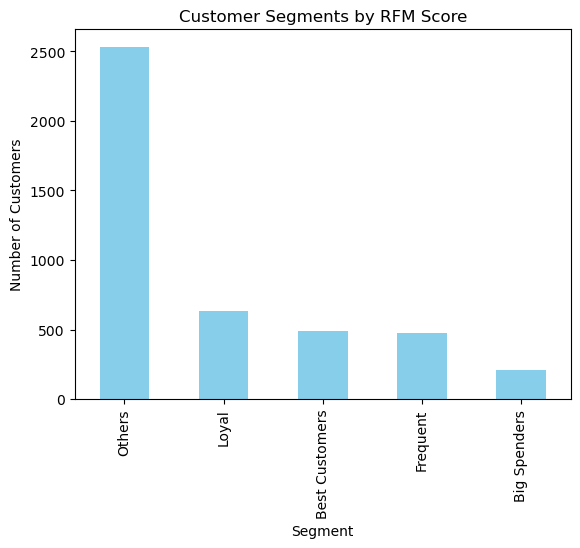

In [27]:
#Frequency Plot of Customer Segments
segment_counts = rfm['Segment'].value_counts()
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segments by RFM Score')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

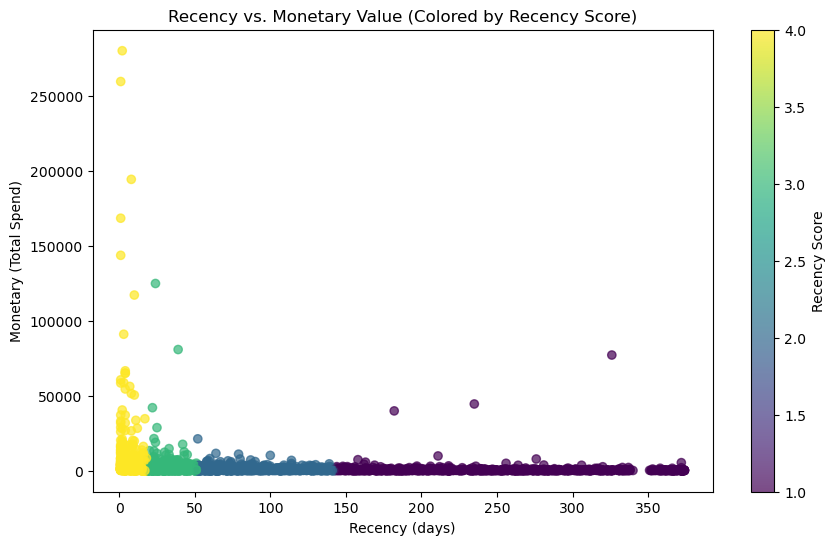

In [28]:
#Scatter Plot - RFM Segments
plt.figure(figsize=(10,6))
plt.scatter(rfm['Recency'], rfm['Monetary'], alpha=0.7, c=rfm['R_score'], cmap='viridis')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (Total Spend)')
plt.title('Recency vs. Monetary Value (Colored by Recency Score)')
plt.colorbar(label='Recency Score')
plt.show()


In [29]:
#Purchase Behavior Features (per customer)
#avg order value
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']
#purchase span
purchase_span = df.groupby('CustomerID').agg({
    'InvoiceDate': [np.min, np.max]
})
purchase_span.columns = ['FirstPurchaseDate', 'LastPurchaseDate']
purchase_span['PurchaseSpan'] = (purchase_span['LastPurchaseDate'] - purchase_span['FirstPurchaseDate']).dt.days
rfm = rfm.merge(purchase_span[['PurchaseSpan']], on='CustomerID', how='left')
#Purchase frequency rate
rfm['OrderRate'] = rfm['Frequency'] / rfm['PurchaseSpan'].replace(0, 1)  


/var/folders/xh/567fcvbs1gs5gqz64rfth0pm0000gn/T/ipykernel_15528/1043303253.py:5: FutureWarning: The provided callable <function min at 0x107d4e700> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  purchase_span = df.groupby('CustomerID').agg({
/var/folders/xh/567fcvbs1gs5gqz64rfth0pm0000gn/T/ipykernel_15528/1043303253.py:5: FutureWarning: The provided callable <function max at 0x107d4e5c0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  purchase_span = df.groupby('CustomerID').agg({


In [30]:
#Time-Based Features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceWeekday'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

In [31]:
#Geographic and Product-Level Features
#Country-wise purchase behavior
country_features = df.groupby('CustomerID')['Country'].agg(lambda x: x.mode().iloc[0])  # Most frequent country
rfm = rfm.merge(country_features.rename('Country'), on='CustomerID', how='left')
#Most frequent product purchased by each customer (top product ID)
customer_top_product = df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()
top_product = customer_top_product.sort_values('Quantity', ascending=False).groupby('CustomerID').first()
rfm = rfm.merge(top_product[['StockCode']].rename(columns={'StockCode': 'TopProduct'}), on='CustomerID', how='left')

In [32]:
#Activity-Based Counts
purchase_days = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.dt.date.nunique())
rfm['ActiveDays'] = purchase_days


# Distribution of Average Order Value (AOV)

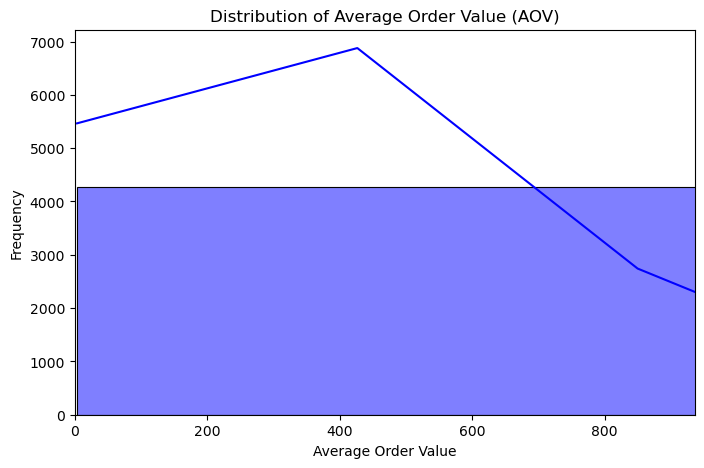

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['AvgOrderValue'], bins=50, kde=True, color='blue')
plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.xlim(0, rfm['AvgOrderValue'].quantile(0.95))  # limit x-axis for clarity
plt.show()

# Frequency vs. Average Order Value Scatter Plot

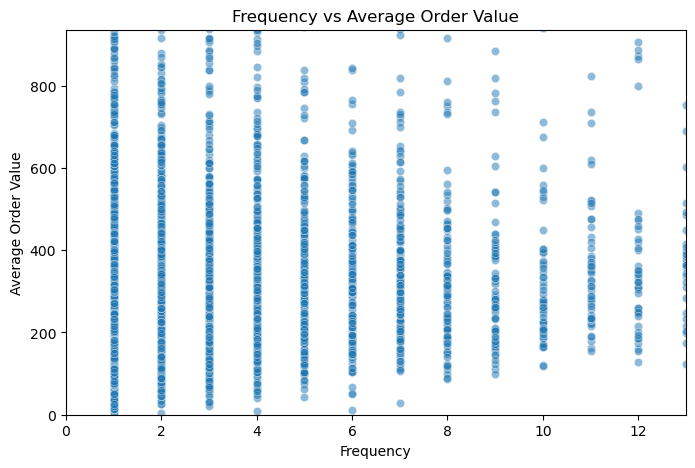

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Frequency', y='AvgOrderValue', data=rfm, alpha=0.5)
plt.title('Frequency vs Average Order Value')
plt.xlabel('Frequency')
plt.ylabel('Average Order Value')
plt.xlim(0, rfm['Frequency'].quantile(0.95))
plt.ylim(0, rfm['AvgOrderValue'].quantile(0.95))
plt.show()

# Distribution of Purchase Span (Days)

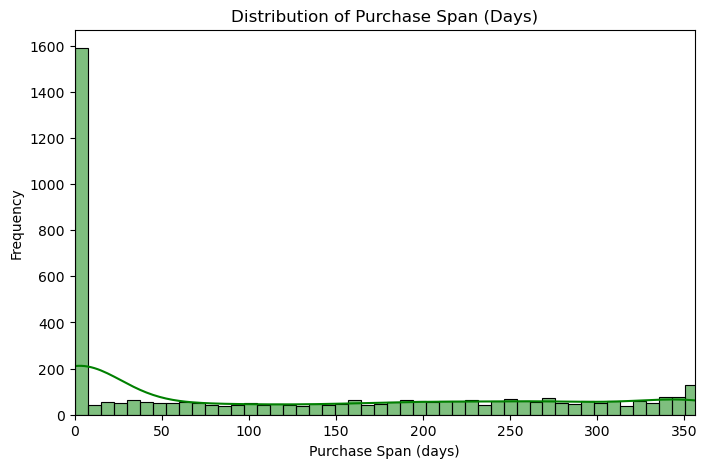

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['PurchaseSpan'], bins=50, kde=True, color='green')
plt.title('Distribution of Purchase Span (Days)')
plt.xlabel('Purchase Span (days)')
plt.ylabel('Frequency')
plt.xlim(0, rfm['PurchaseSpan'].quantile(0.95))
plt.show()

# Distribution of Order Rate

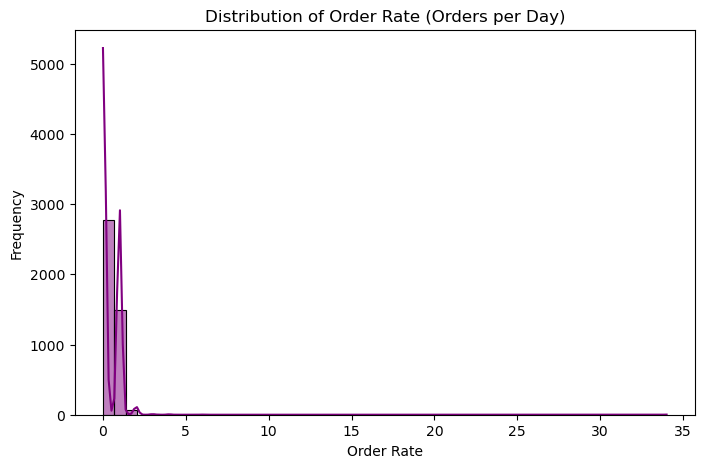

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['OrderRate'], bins=50, kde=True, color='purple')
plt.title('Distribution of Order Rate (Orders per Day)')
plt.xlabel('Order Rate')
plt.ylabel('Frequency')
plt.show()

# Top Products by Number of Purchases

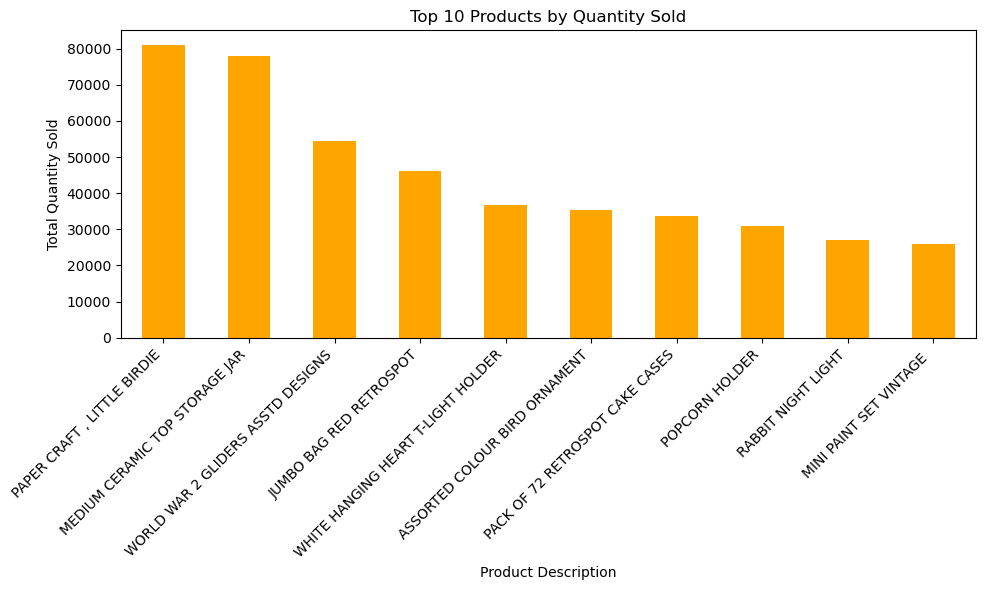

In [37]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top Countries by Number of Transactions

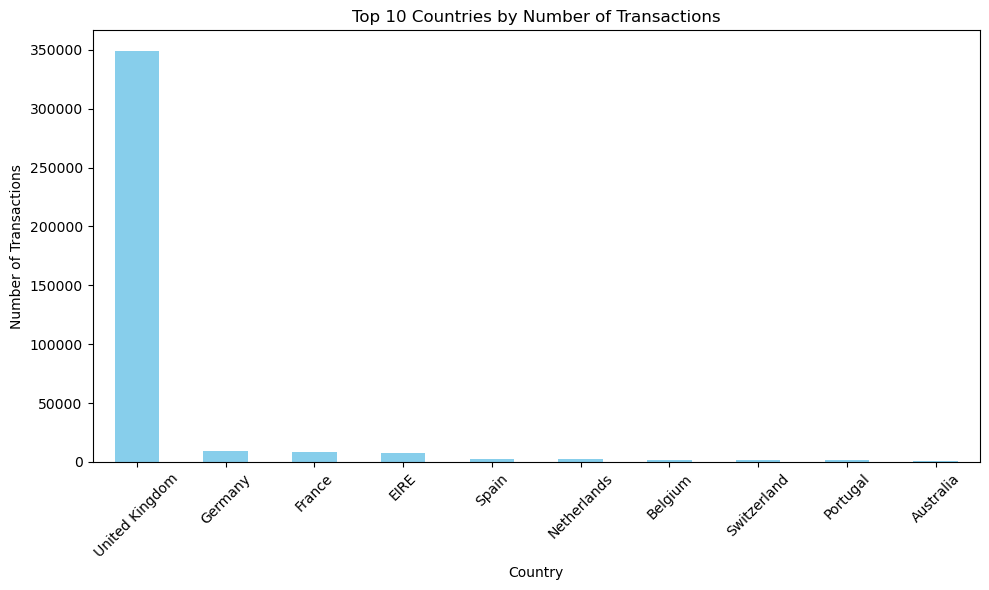

In [38]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3-D scatter-plot for RFM features

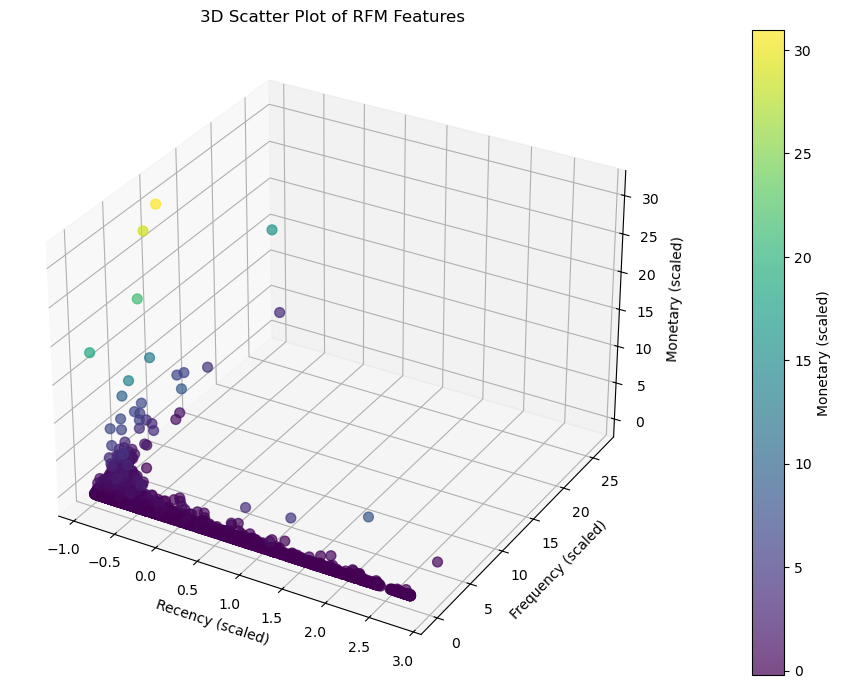

In [39]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Scaling:
from sklearn.preprocessing import StandardScaler
features = ['Recency', 'Frequency', 'Monetary']
X = rfm[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plotting
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                c=X_scaled[:, 2], cmap='viridis', s=50, alpha=0.7)  # Color by Monetary

ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Monetary (scaled)')
ax.set_title('3D Scatter Plot of RFM Features')

fig.colorbar(sc, ax=ax, pad=0.1, label='Monetary (scaled)')
plt.tight_layout()
plt.show()

Each point represents a customer.\
Use Recency, Frequency, and Monetary as axes.\
Color intensity shows higher/lower monetary value.\
Rotating the chart interactively (if supported by your environment) helps investigate structure.

# Select Features for Clustering

In [40]:
# Select features
features = ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'PurchaseSpan', 'OrderRate']
X = rfm[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Identify the Optimal Number of Clusters (Elbow Method)

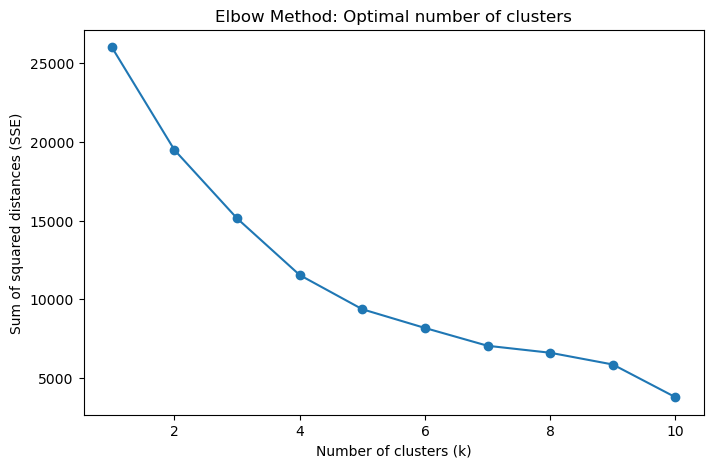

In [41]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method: Optimal number of clusters')
plt.show()


# Apply K-Means Clustering

In [42]:
kmeans = KMeans(n_clusters=5, random_state=42)
#I had taken the 5 clusters but you can also take 4 clusters according to elbow curve
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

In [43]:
# Size of each cluster
print(rfm['Cluster'].value_counts())

# Cluster profile
print(rfm.groupby('Cluster')[features].mean())


Cluster
0    1893
1    1487
4     943
3      13
2       2
Name: count, dtype: int64
            Recency  Frequency       Monetary  AvgOrderValue  PurchaseSpan  \
Cluster                                                                      
0         37.707871   7.032224    2948.537248     388.195234    265.036450   
1         56.914593   1.832549     678.010943     380.016852     29.141896   
2        163.500000   1.500000  122828.050000   80709.925000    102.000000   
3          7.615385  86.230769  119231.583846    2189.613633    360.000000   
4        259.792153   1.453871     532.087933     341.382539     16.918346   

         OrderRate  
Cluster             
0         0.025575  
1         0.623425  
2         0.504902  
3         0.236234  
4         0.862133  


# Feature Engineering

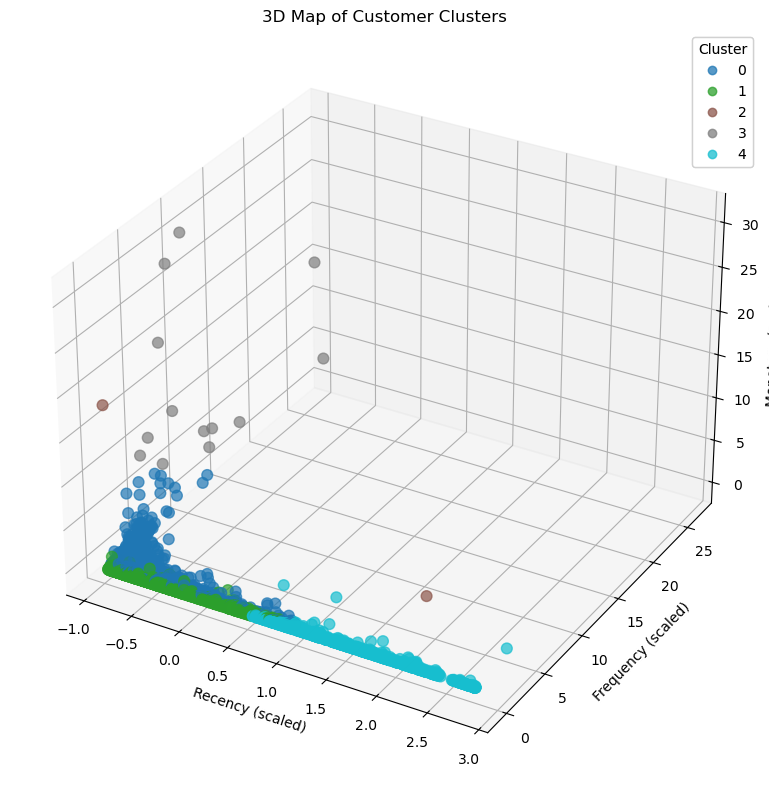

In [44]:
# Choose three features to visualize ( Recency, Frequency, Monetary)
features_3d = ['Recency', 'Frequency', 'Monetary']

# If you scaled your features, use those scaled values; otherwise, use the original
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_3d = scaler.fit_transform(rfm[features_3d])
rfm[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']] = X_3d

# Prepare the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, coloring by cluster label
scatter = ax.scatter(
    X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
    c=rfm['Cluster'], cmap='tab10', s=60, alpha=0.7
)

ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Monetary (scaled)')
ax.set_title('3D Map of Customer Clusters')

# Optional: Add a legend for cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.tight_layout()
plt.show()

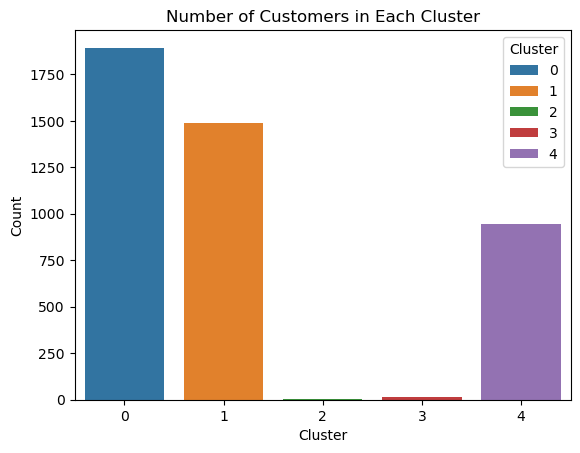

In [45]:
#Count of data in each clusters
sns.countplot(x='Cluster', data=rfm, hue='Cluster',palette='tab10')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Labeling clusters

In [46]:
means = rfm[['Recency', 'Frequency', 'Monetary']].mean()
stds = rfm[['Recency', 'Frequency', 'Monetary']].std()
recency_30 = (30 - means['Recency']) / stds['Recency']
recency_90 = (90 - means['Recency']) / stds['Recency']
recency_180 = (180 - means['Recency']) / stds['Recency']

frequency_2 = (2 - means['Frequency']) / stds['Frequency']
frequency_4 = (4 - means['Frequency']) / stds['Frequency']
frequency_10 = (10 - means['Frequency']) / stds['Frequency']

monetary_1000 = (1000 - means['Monetary']) / stds['Monetary']
monetary_5000 = (5000 - means['Monetary']) / stds['Monetary']

# Now define the labeling function using scaled values:
def label_segment_scaled(row):
    if row['Recency'] < recency_30 and row['Frequency'] > frequency_10 and row['Monetary'] > monetary_5000:
        return "High-Value"
    elif row['Frequency'] >= frequency_4 and row['Monetary'] >= monetary_1000:
        return "Regular"
    elif row['Frequency'] <= frequency_2 and row['Recency'] > recency_90:
        return "Occasional"
    elif row['Recency'] > recency_180 and row['Frequency'] <= frequency_2:
        return "At-Risk"
    else:
        return "Other"

rfm['Segment_Label_Scaled'] = rfm.apply(label_segment_scaled, axis=1)

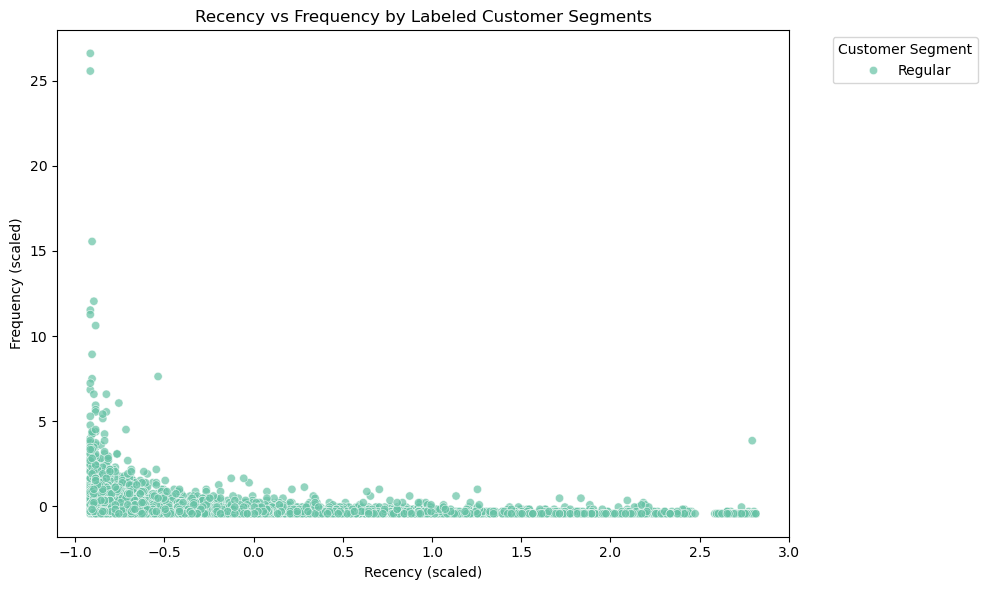

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency_scaled',
    y='Frequency_scaled',
    hue='Segment_Label_Scaled',  # Your segment labels like High-Value, Regular, Occasional, At-Risk
    data=rfm,
    palette='Set2',
    alpha=0.7
)
plt.title('Recency vs Frequency by Labeled Customer Segments')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

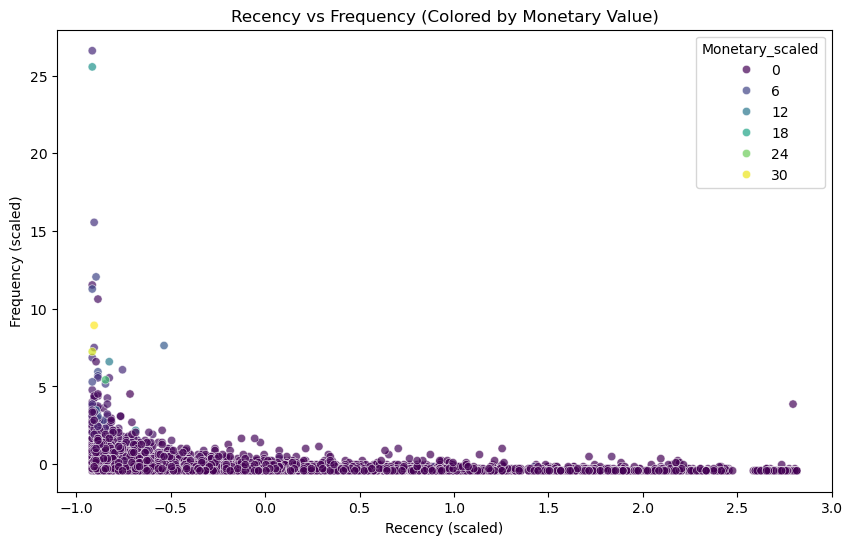

In [48]:
# 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency_scaled', 
    y='Frequency_scaled', 
    hue='Monetary_scaled', 
    palette='viridis', 
    data=rfm, 
    alpha=0.7
)
plt.title('Recency vs Frequency (Colored by Monetary Value)')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.show()

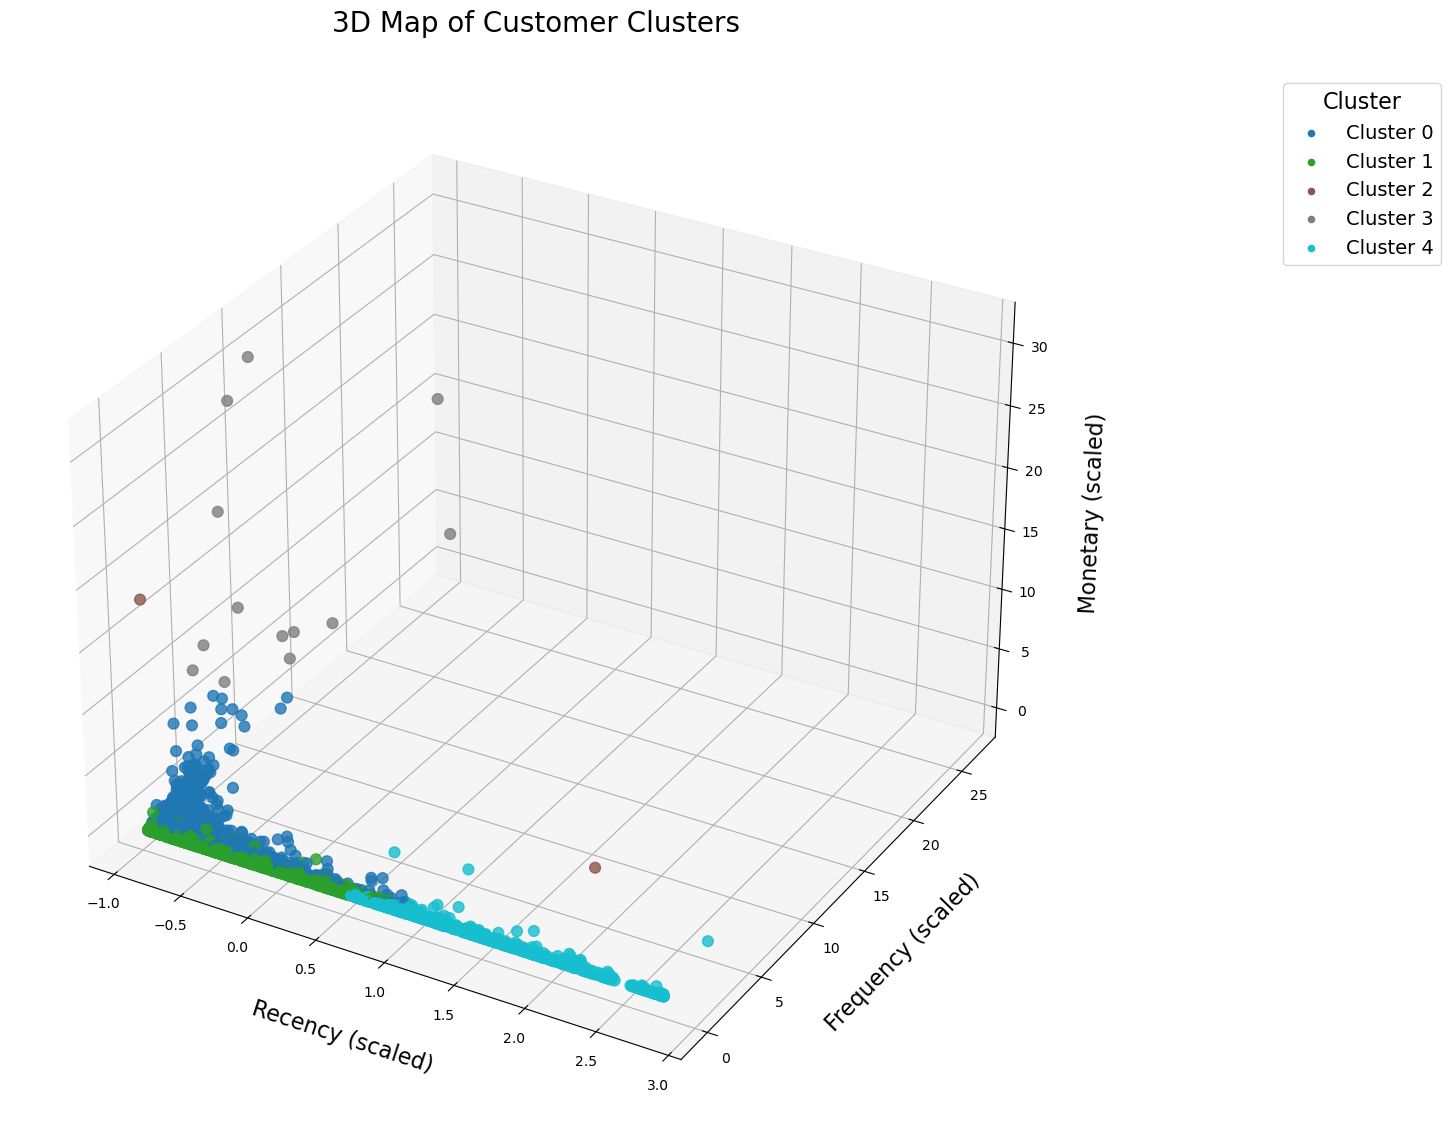

In [49]:
from mpl_toolkits.mplot3d import Axes3D
# 3D scatter plot
fig = plt.figure(figsize=(18, 12))  # Significantly increased size
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    rfm['Recency_scaled'],
    rfm['Frequency_scaled'],
    rfm['Monetary_scaled'],
    c=rfm['Cluster'],
    cmap='tab10',
    s=60,
    alpha=0.8
)

# Axis labels and title with larger font size
ax.set_xlabel('Recency (scaled)', fontsize=16, labelpad=18)
ax.set_ylabel('Frequency (scaled)', fontsize=16, labelpad=18)
ax.set_zlabel('Monetary (scaled)', fontsize=16, labelpad=18)
ax.set_title('3D Map of Customer Clusters', fontsize=20, pad=30)

# Create custom legend for cluster labels
clusters = np.unique(rfm['Cluster'])
colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))
for cluster, color in zip(clusters, colors):
    ax.scatter([], [], [], c=[color], label=f'Cluster {cluster}')

ax.legend(title='Cluster', bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=14, title_fontsize=16)

plt.tight_layout(pad=3)
plt.show()

# Evaluation of K-means Clustering

In [50]:
from sklearn.metrics import silhouette_score , davies_bouldin_score
# Silhouette Score
sil_score = silhouette_score(X_scaled, rfm['Cluster'])

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, rfm['Cluster'])

print(f"Silhouette Score: {sil_score:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.42
Davies-Bouldin Index: 0.74


# Applying DBSCAN model for clustering

In [51]:
from sklearn.cluster import DBSCAN

# Example: eps=0.5, min_samples=12 (adjust these for your data)
dbscan = DBSCAN(eps=0.5, min_samples=12)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the DBSCAN cluster labels to your DataFrame
rfm['DBSCAN_Cluster'] = dbscan_labels

In [52]:
# Size of each cluster
print(rfm['DBSCAN_Cluster'].value_counts())

# Cluster profile
print(rfm.groupby('DBSCAN_Cluster')[features].mean())


DBSCAN_Cluster
 0    4149
-1     133
 1      30
 2      26
Name: count, dtype: int64
                   Recency  Frequency      Monetary  AvgOrderValue  \
DBSCAN_Cluster                                                       
-1               61.007519  25.488722  26925.904511    2817.580992   
 0               93.000964   3.622560   1272.035884     342.929759   
 1               49.400000   2.000000    547.709000     273.854500   
 2              229.461538   2.000000    459.824615     229.912308   

                PurchaseSpan  OrderRate  
DBSCAN_Cluster                           
-1                236.488722   0.720918  
 0                128.809111   0.381932  
 1                  0.066667   2.000000  
 2                  0.076923   2.000000  


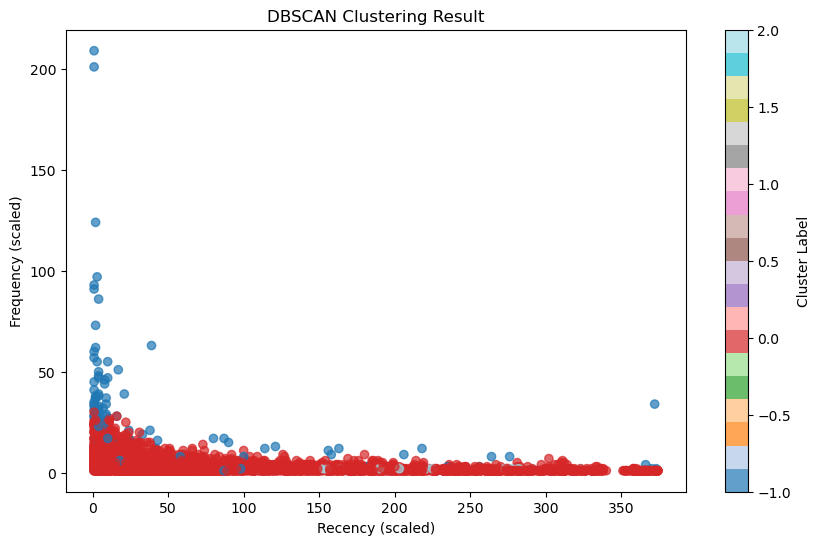

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(
    rfm['Recency'], 
    rfm['Frequency'], 
    c=rfm['DBSCAN_Cluster'], 
    cmap='tab20', 
    alpha=0.7
)
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.title('DBSCAN Clustering Result')
plt.colorbar(label='Cluster Label')
plt.show()

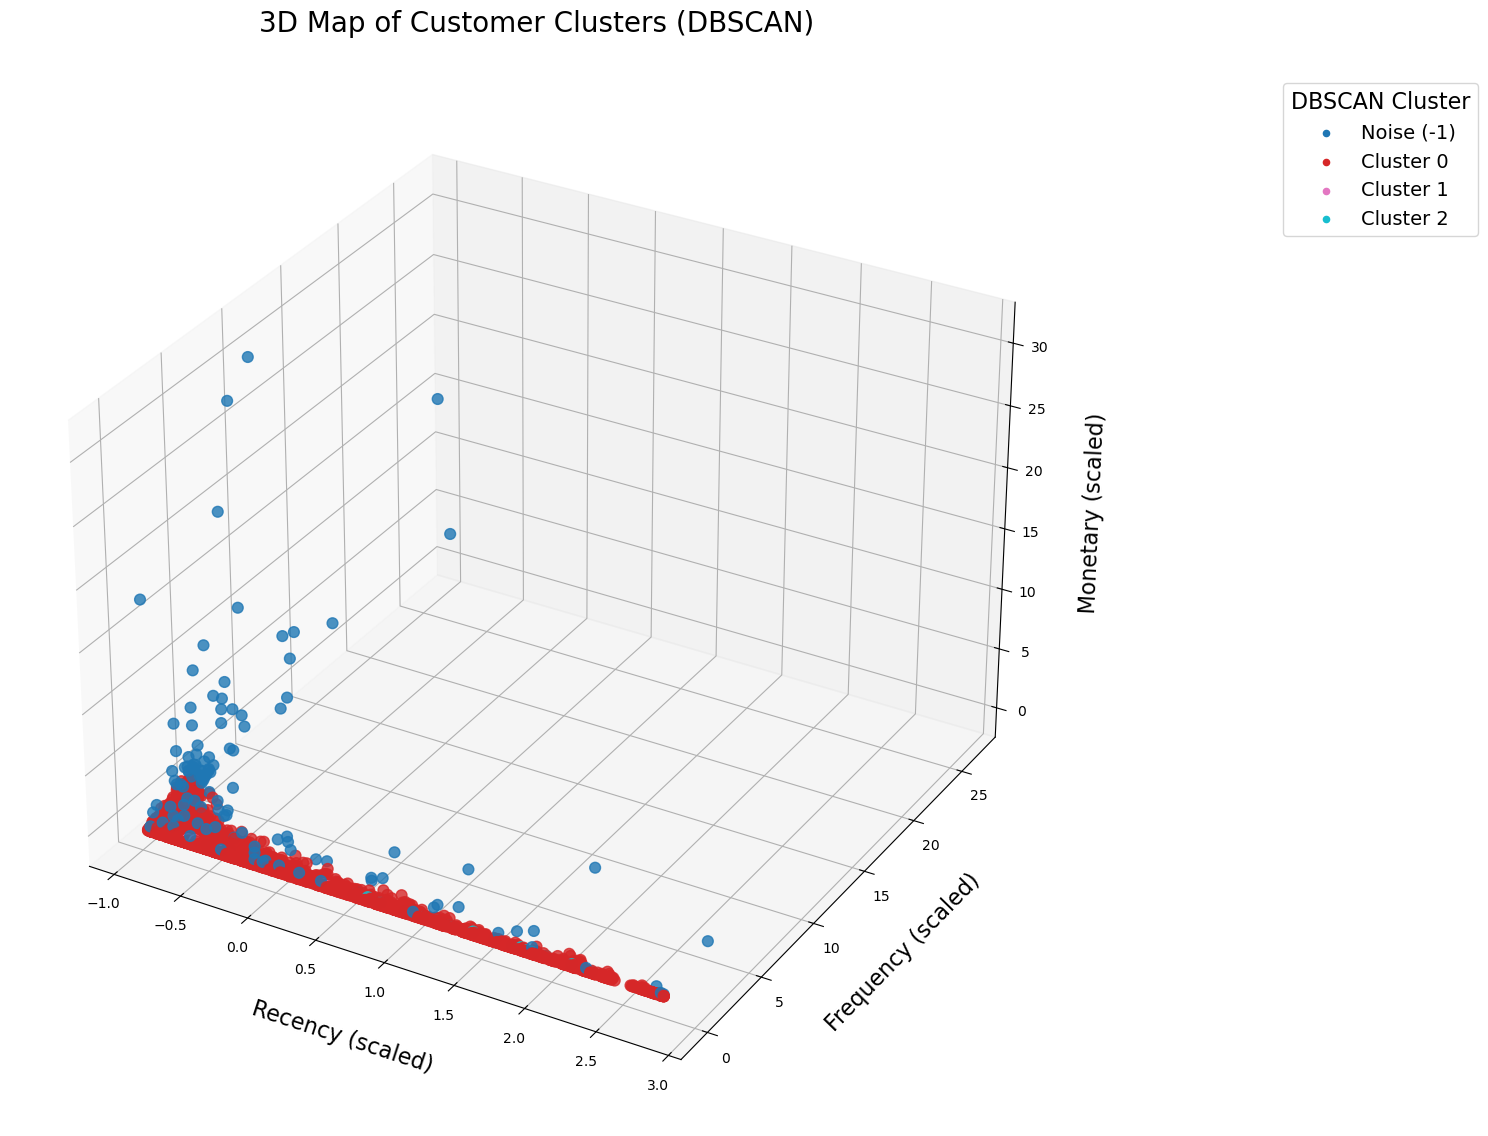

In [54]:
# 3D scatter plot
fig = plt.figure(figsize=(18, 12)) 

ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot with DBSCAN cluster labels
sc = ax.scatter(
    rfm['Recency_scaled'],
    rfm['Frequency_scaled'],
    rfm['Monetary_scaled'],
    c=rfm['DBSCAN_Cluster'],
    cmap='tab10',
    s=60,
    alpha=0.8
)

# Axis labels and title with larger font size for clarity
ax.set_xlabel('Recency (scaled)', fontsize=16, labelpad=18)
ax.set_ylabel('Frequency (scaled)', fontsize=16, labelpad=18)
ax.set_zlabel('Monetary (scaled)', fontsize=16, labelpad=18)
ax.set_title('3D Map of Customer Clusters (DBSCAN)', fontsize=20, pad=30)

# Create custom legend for DBSCAN cluster labels, including noise
clusters = np.unique(rfm['DBSCAN_Cluster'])
colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))
for cluster, color in zip(clusters, colors):
    label = f'Cluster {cluster}' if cluster != -1 else 'Noise (-1)'
    ax.scatter([], [], [], c=[color], label=label)

ax.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=14, title_fontsize=16)

plt.tight_layout(pad=3)
plt.show()

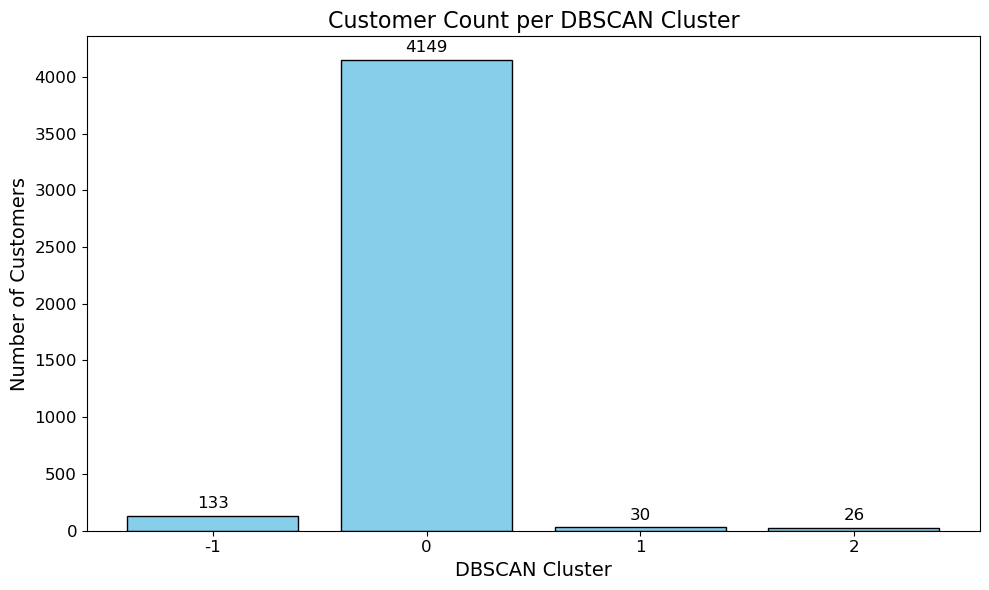

In [55]:
# Count of customers/data points in each DBSCAN cluster
cluster_counts = rfm['DBSCAN_Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color='skyblue', edgecolor='black')

plt.xlabel('DBSCAN Cluster', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Customer Count per DBSCAN Cluster', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(cluster_counts.values)*0.01, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics import silhouette_score , davies_bouldin_score
# Silhouette Score
sil_score = silhouette_score(X_scaled, rfm['DBSCAN_Cluster'])

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, rfm['DBSCAN_Cluster'])

print(f"Silhouette Score: {sil_score:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.15
Davies-Bouldin Index: 1.43


From the above observation we can see that K-means is the best clustering model for this dataset so we will save it for streamlit.

In [57]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

# For loading this model in Streamlit perform these operations

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

#the user-item matrix (CustomerID × StockCode)
user_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='TotalPrice',
    aggfunc='sum',
    fill_value=0
)

# Transpose to get item-item matrix (each column = product vector)
item_vectors = user_item_matrix.T

# Compute cosine similarity between items
item_similarity = pd.DataFrame(
    cosine_similarity(item_vectors),
    index=item_vectors.index,
    columns=item_vectors.index
)

# Function to get top N similar products
def get_similar_products(product_code, top_n=5):
    if product_code not in item_similarity.index:
        print("Product ID not found.")
        return []
    # Sort products by similarity score (excluding itself)
    similar_scores = item_similarity[product_code].drop(labels=[product_code]).sort_values(ascending=False)
    return similar_scores.head(top_n)

product_id = '84077'  
top_similar = get_similar_products(product_id, top_n=5)

print(f"Top 5 products similar to {product_id}:")
print(top_similar)


Top 5 products similar to 84077:
StockCode
22440    0.787418
21915    0.761652
21749    0.736698
21891    0.712710
22086    0.570587
Name: 84077, dtype: float64


# 🧩 Conclusion

This project successfully demonstrates a real-world application of data science in retail for improving customer engagement and cross-selling strategies. By integrating customer segmentation and product recommendation into one cohesive pipeline, we’ve made it possible to both understand customer behavior and act on it through automated insights. K-Means clustering enabled effective segmentation of customers based on RFM metrics and other behavioral features, while the collaborative filtering system provided personalized product recommendations grounded in purchase history. The deployment of these models through a user-friendly Streamlit app transforms the analysis into a powerful, interactive tool that can support strategic decisions across marketing, sales, and retention efforts. Overall, this project bridges the gap between raw transactional data and actionable business intelligence.